[Архив погоды](https://rp5.ru/%D0%90%D1%80%D1%85%D0%B8%D0%B2_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D1%8B_%D0%B2_%D0%A8%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D1%82%D1%8C%D0%B5%D0%B2%D0%BE,_%D0%B8%D0%BC._%D0%90._%D0%A1._%D0%9F%D1%83%D1%88%D0%BA%D0%B8%D0%BD%D0%B0_(%D0%B0%D1%8D%D1%80%D0%BE%D0%BF%D0%BE%D1%80%D1%82))

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from pandas.plotting import autocorrelation_plot

In [4]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'data',
 'README.md',
 'Интенсив_анализ_данных_Борнева.pptx',
 'Погода 1-Copy1.ipynb',
 'Погода 1.ipynb']

In [5]:
data_msk = pd.read_excel('data/Мск_5лет.xls', skiprows=6)[::-1]
data_msk = data_msk.rename(columns={'Местное время в Москве (ВДНХ)': 'Time'})
data_msk.index = pd.to_datetime(data_msk['Time'], format='%d.%m.%Y %H:%M')

data_spb = pd.read_excel('data/СПб_5лет.xls', skiprows=6)[::-1]
data_spb = data_spb.rename(columns={'Местное время в Санкт-Петербурге': 'Time'})
data_spb.index = pd.to_datetime(data_spb['Time'], format='%d.%m.%Y %H:%M')

data_vell = pd.read_excel('data/Вэллингтон.xls', skiprows=6)[::-1]
data_vell = data_vell.rename(columns={'Местное время в Веллингтоне (аэропорт)': 'Time'})
data_vell.index = pd.to_datetime(data_vell['Time'], format='%d.%m.%Y %H:%M')

In [6]:
msk_day = data_msk[data_msk.index.hour == 12]

In [7]:
# Описание данных

In [10]:
msk_day.describe()

,T,Po,P,Pa,U,Ff,ff10,ff3,Tn,Tx,VV,Td,tR,Tg
count,1826.000000,1826.000000,1826.000000,1815.000000,1825.000000,1826.000000,19.000000,86.000000,0.0,0.0,1820.000000,1825.000000,0.0,0.0
mean,8.772837,747.612103,762.026177,0.021543,65.252055,1.570646,10.421053,11.046512,NaN,NaN,8.523187,1.607507,NaN,NaN
std,10.986743,7.655981,7.868374,0.912714,20.220360,0.801159,0.606977,1.264046,NaN,NaN,2.664971,8.619287,NaN,NaN
min,-26.900000,718.200000,732.400000,-5.200000,14.000000,0.000000,10.000000,10.000000,NaN,NaN,0.200000,-30.500000,NaN,NaN
25%,0.400000,742.600000,756.900000,-0.500000,49.000000,1.000000,10.000000,10.000000,NaN,NaN,10.000000,-4.200000,NaN,NaN
50%,8.050000,747.500000,761.800000,0.000000,68.000000,1.000000,10.000000,11.000000,NaN,NaN,10.000000,1.100000,NaN,NaN
75%,18.500000,752.500000,766.900000,0.500000,83.000000,2.000000,11.000000,12.000000,NaN,NaN,10.000000,8.700000,NaN,NaN
max,31.700000,774.100000,789.100000,4.900000,100.000000,5.000000,12.000000,14.000000,NaN,NaN,10.000000,19.900000,NaN,NaN


In [11]:
# Посмотрим распределение значений

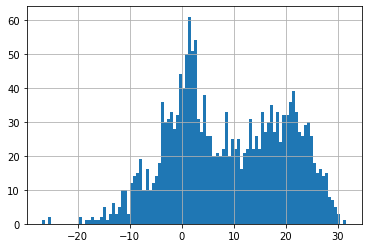

In [18]:
msk_day['T'].hist(bins=100)

In [19]:
# Посмотрим, как изменялась суточная температура

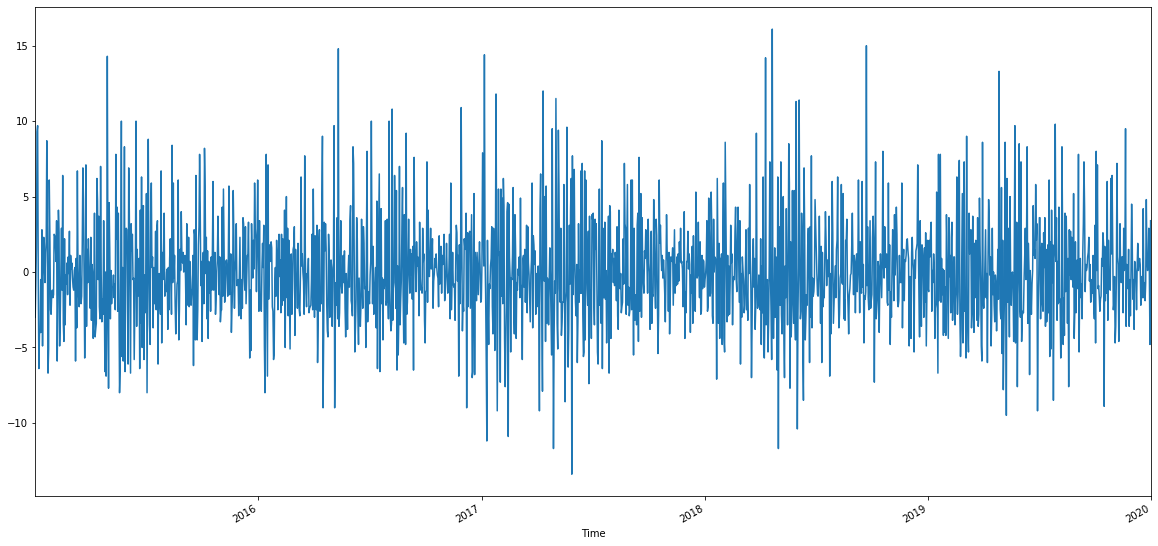

In [21]:
plt.figure(figsize=(20, 10))
msk_day['T'].diff().plot()

In [23]:
diffs = msk_day['T'].diff()
diffs.sort_values(ascending=False)

Time
2018-04-21 12:00:00    16.1
2018-09-22 12:00:00    15.0
2016-05-11 12:00:00    14.8
2017-01-05 12:00:00    14.4
2015-04-29 12:00:00    14.3
                       ... 
2017-01-09 12:00:00   -11.2
2017-04-28 12:00:00   -11.7
2018-05-01 12:00:00   -11.7
2017-05-28 12:00:00   -13.4
2020-01-01 12:00:00     NaN
Name: T, Length: 1826, dtype: float64

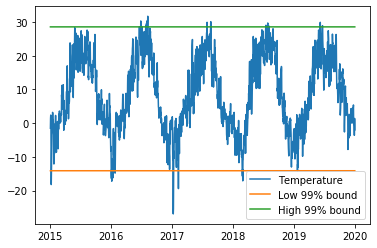

In [32]:
low, high = msk_day['T'].quantile([0.01, 0.99])
plt.plot(msk_day['T'], label='Temperature')
plt.plot(msk_day['T'].index, [low]*len(msk_day), label='Low 99% bound')
plt.plot(msk_day['T'].index, [high]*len(msk_day), label='High 99% bound')
plt.legend()

In [33]:
# Аномалии

In [34]:
msk_day[msk_day['T'] < low]

,Time,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
Time,,,,,,,,,,,,,,,,,,,,,
2019-01-22 12:00:00,22.01.2019 12:00,-14.2,748.2,763.9,1.2,73.0,"Ветер, дующий с северо-северо-запада",2,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-18.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28 12:00:00,28.02.2018 12:00,-17.1,763.7,779.9,0.1,65.0,"Ветер, дующий с северо-востока",2,NaN,NaN,...,"Высококучевые, просвечивающие или плотные в дв...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-22.2,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-26 12:00:00,26.02.2018 12:00,-15.7,754.9,770.8,0.1,67.0,"Ветер, дующий с северо-северо-востока",1,NaN,NaN,...,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-20.5,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-25 12:00:00,25.02.2018 12:00,-14.8,755.2,771.1,-0.2,69.0,"Ветер, дующий с севера",2,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-19.3,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-08 12:00:00,08.02.2017 12:00,-14.9,765.7,781.9,0.0,70.0,"Ветер, дующий с северо-северо-запада",2,NaN,NaN,...,Высокослоистые просвечивающие.,NaN,10.0,-19.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-07 12:00:00,07.02.2017 12:00,-19.4,766.2,782.6,0.8,65.0,"Ветер, дующий с севера",2,NaN,NaN,...,NaN,NaN,10.0,-24.3,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-06 12:00:00,06.02.2017 12:00,-15.0,758.5,774.4,1.2,72.0,"Ветер, дующий с северо-северо-востока",2,NaN,NaN,...,NaN,NaN,10.0,-18.9,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09 12:00:00,09.01.2017 12:00,-19.5,755.2,771.4,-0.3,84.0,"Штиль, безветрие",0,NaN,NaN,...,"Высококучевые просвечивающие, расположенные на...",Перистые (часто в виде полос) и перисто-слоист...,10.0,-21.6,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-08 12:00:00,08.01.2017 12:00,-25.4,757.4,774.1,0.3,76.0,"Ветер, дующий с севера",1,NaN,NaN,...,NaN,NaN,10.0,-28.4,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
msk_day[msk_day['U'].isna()]

,Time,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
Time,,,,,,,,,,,,,,,,,,,,,
2015-01-11 12:00:00,11.01.2015 12:00,-2.9,721.8,736.3,-2.5,NaN,"Ветер, дующий с юго-юго-востока",2,NaN,10.0,...,Высокослоистые непросвечивающие или слоисто-до...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Humidity')

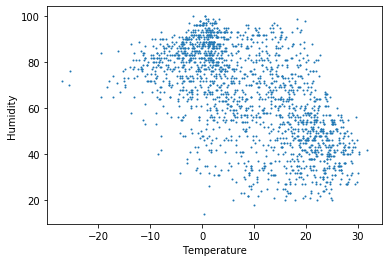

In [46]:
plt.scatter(msk_day['T'], msk_day['U'], s=1)
plt.xlabel('Temperature')
plt.ylabel('Humidity')

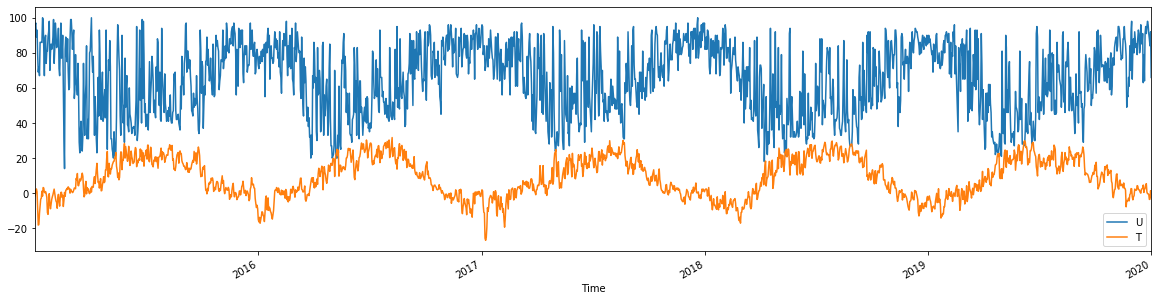

In [49]:
msk_day['U'].plot(figsize=(20,5))
msk_day['T'].plot()
plt.legend()